
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
#1 Manual Standard Scalar
class StandardScalerManual:
  def __init__(self):
    self.mean=None
    self.std=None

  def fit(self, X):
    self.mean=np.mean(X,axis=0)
    self.std=np.std(X,axis=0)
    self.std[self.std==0]=1.0

  def transform(self, X):
    if self.mean is None or self.std is None:
      raise Exception("Scaler not fitted")
    return (X-self.mean)/self.std

  def fit_transform(self, X):
      self.fit(X)
      return self.transform(X)


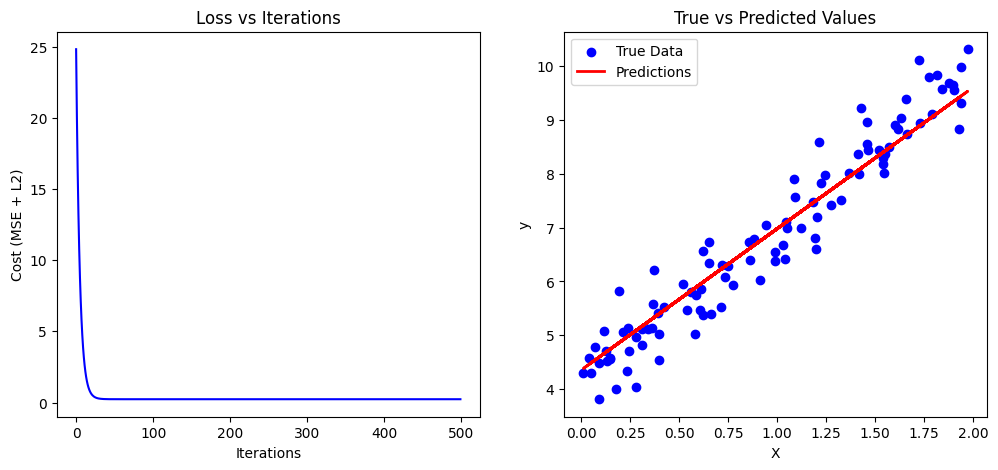

In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
  def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
      self.lr=lr
      self.epochs=epochs
      self.l2_lambda=l2_lambda
      self.w=None
      self.b=None
      self.loss_his=[]

  def fit(self, X, y):
      m,n=X.shape
      self.w=np.zeros(n)
      self.b=0
      for i in range (self.epochs):
        y_predict=np.dot(X,self.w)+self.b
        error=y_predict-y
        dw=np.dot(X.T,error)/m+(self.l2_lambda*self.w)
        db=np.sum(error)/m
        self.w-=self.lr*dw
        self.b-=self.lr*db
        loss=np.sum(error*error)/(2*m)
        l2_pen=(self.l2_lambda/2)*np.sum(self.w*self.w)
        self.loss_his.append(loss+l2_pen)

  def predict(self, X):
      return np.dot(X,self.w)+self.b

# data generation
np.random.seed(42)
X_train=2*np.random.rand(100,1)
y_train=4+3*X_train.flatten()+np.random.randn(100)*0.5
scaler=StandardScalerManual()
x_scaled=scaler.fit_transform(X_train)
model=LinearRegressionManual(lr=0.1,epochs=500,l2_lambda=0.1)
model.fit(x_scaled,y_train)


#4 plotting
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(model.loss_his, color='blue')
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE + L2)")

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='True Data')
plt.plot(X_train, model.predict(x_scaled), color='red', linewidth=2, label='Predictions')
plt.title("True vs Predicted Values")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.show()




## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    z=np.clip(z,-250,250)
    return 1/(1+np.exp(-z))


Final Accuracy: 94.00%


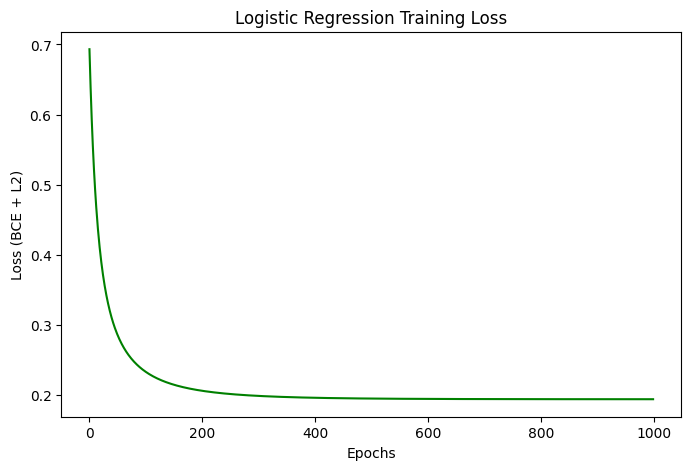

In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
  def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
    self.lr=lr
    self.epochs=epochs
    self.l2_lambda=l2_lambda
    self.w=None
    self.b=None
    self.loss_his=[]

  def fit(self, X, y):
    m,n=X.shape
    self.w=np.zeros(n)
    self.b=0
    for i in range (self.epochs):
      z=np.dot(X,self.w)+self.b
      y_predict=sigmoid(z)
      error=y_predict-y
      dw=np.dot(X.T,error)/m+(self.l2_lambda*self.w)
      db=np.sum(error)/m
      self.w-=self.lr*dw
      self.b-=self.lr*db
      epsilon=1e-15
      y_predict=np.clip(y_predict,epsilon,1-epsilon)
      bce_loss=-np.sum(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))/m
      l2_pen=(self.l2_lambda/2)*np.sum(self.w*self.w)
      self.loss_his.append(bce_loss+l2_pen)

  def predict_proba(self, X):
    z=np.dot(X,self.w)+self.b
    return sigmoid(z)

  def predict(self, X):
    pred=self.predict_proba(X)
    return (pred>=0.5).astype(int)

np.random.seed(42)
X_c1=np.random.randn(50,2)+2
X_c2=np.random.randn(50,2)+4
X=np.vstack((X_c1,X_c2))
y=np.hstack((np.zeros(50),np.ones(50)))
scaler=StandardScalerManual()
x_scaled=scaler.fit_transform(X)

model2=LogisticRegressionManual(lr=0.1,epochs=1000,l2_lambda=0.01)
model2.fit(x_scaled,y)

y_pred=model2.predict(x_scaled)
accuracy=np.mean(y_pred==y)
print(f"Final Accuracy: {accuracy * 100:.2f}%")
#plot
plt.figure(figsize=(8, 5))
plt.plot(model2.loss_his, color='green')
plt.title("Logistic Regression Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (BCE + L2)")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
  rows,cols=M.shape
  flat_M=M.reshape(-1,1)
  kmeans=KMeans(n_clusters=k,max_iter=max_iters,random_state=42,n_init=10)
  kmeans.fit(flat_M)

  flat_labels=kmeans.labels_
  centroids=kmeans.cluster_centers_.flatten()
  assignment_table=flat_labels.reshape(rows,cols)
  cookbook={i:[] for i in range(k)}

  for i in range(rows):
    for j in range(cols):
      cluster_id=assignment_table[i,j]
      cookbook[cluster_id].append((i,j))

  return assignment_table,cookbook,centroids
  # '''
  # Returns:
  # assignment_table: same shape as M, contains cluster labels
  # cookbook: dict -> cluster_id : list of (i, j) positions
  # centroids: numpy array of centroid values
  # '''
# random matrix generation
np.random.seed(42)
M=np.random.randint(0,255,(10,10))

#running K-means with k=3
assignment,cookbook,centroids=kmeans_matrix(M,k=3)
print("--- Results ---")
print("Centroids found:", np.sort(centroids))
print("\nAssignment Table (First 5 rows):\n", assignment[:5, :])
print(f"\nNumber of items in Cluster 0: {len(cookbook[0])}")
print(f"First 3 positions in Cluster 0: {cookbook[0][:3]}")


--- Results ---
Centroids found: [ 35.7        110.53125    206.28947368]

Assignment Table (First 5 rows):
 [[2 0 2 1 2 1 0 1 2 2]
 [0 0 2 0 2 2 2 2 2 2]
 [2 1 1 2 0 2 1 2 0 0]
 [1 0 0 1 1 0 0 2 1 0]
 [1 0 0 0 0 0 1 0 0 0]]

Number of items in Cluster 0: 38
First 3 positions in Cluster 0: [(0, 1), (0, 6), (1, 0)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
